# O Modelo Normal

Creation on August 23 2021.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

github: 

Importar bibliotecas

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.integrate import quad

Definir o estilo dos _plots_.

In [2]:
style.use('seaborn')

Criar a função normal.

In [3]:
def normal_function(x, mu, variance):
    numerator = np.exp((((x - mu) ** 2)*(-1)) / (2*variance))
    denominator = np.sqrt(2*np.pi*variance)
    return numerator / denominator

Criar a função normal acumulada.

In [4]:
def cumulative_distribution_function(inferior_limit, upper_limit, mu, variance):
    value =  quad(normal_function, 
                inferior_limit, 
                upper_limit, 
                (mu,variance))
    return value[0]

Definir a média e a variância. 

Obs: Nos exemplos serão utilizados o modelo normal padrão com média = 0 e variância = 1.

In [5]:
# mean and variance
mu = 0
variance = 1

Definir os eixos x e y.

No eixo x: utilizamos a função _arange_ do numpy para criar uma lista de valores uniformemente separada.

No eixo y: aplicamos a função _normal_function_ para cada valor do eixo x e assim obtemos a lista de valores do eixo y.

In [6]:
# x and y coordinate values
x_values = list(np.around(np.arange(mu - 5, mu + 5.01, 0.01), 2))
y_values = list(map(lambda value: normal_function(value, mu, variance), x_values))

Valor da coordenada (x,y) para o _plot_ de uma linha vertical.

In [7]:
# (x,y) coordinate value for vertical line plot
x_value_mu = x_values[int(len(x_values) / 2)]
y_value_mu = normal_function(x_value_mu, mu, variance)

### Unicaudal


(1) Probabilidade de Z menor ou igual a 1;


(2) Probabilidade de Z maior ou igual a -2.5.

Definir o limite inferior e o limite superior de Z.

In [8]:
# Z inferior and upper values for example 01.
inferior_limit_01 = np.NINF
upper_limit_01 = 1

# Z inferior and upper values for example 02.
inferior_limit_02 = -2.5
upper_limit_02 = np.inf

Probabilidade normal da área do limite inferior até o limite superior

In [9]:
# Normal probability for example 01.
normal_probability_01 = np.around(
    cumulative_distribution_function(inferior_limit_01, 
                                         upper_limit_01, 
                                         mu, variance), 4)
normal_probability_01 = np.around(normal_probability_01, 2)

# Normal probability for example 02.
normal_probability_02 = np.around(
    cumulative_distribution_function(inferior_limit_02, 
                                         upper_limit_02, 
                                         mu, variance), 4)
normal_probability_02 = np.around(normal_probability_02, 2)

Definir a area de preenchimento.

In [10]:
'''Creation of the lists of x and y coordinates for the probability area 
for example 01.'''
x_fill_01 = x_values[0:int(x_values.index(upper_limit_01))]
y_fill_01 = y_values[0:int(x_values.index(upper_limit_01))]

'''Creation of the lists of x and y coordinates for the probability area 
for example 02.'''
x_fill_02 = x_values[int(x_values.index(inferior_limit_02)): len(x_values) - 1]
y_fill_02 = y_values[int(x_values.index(inferior_limit_02)): len(x_values) - 1]

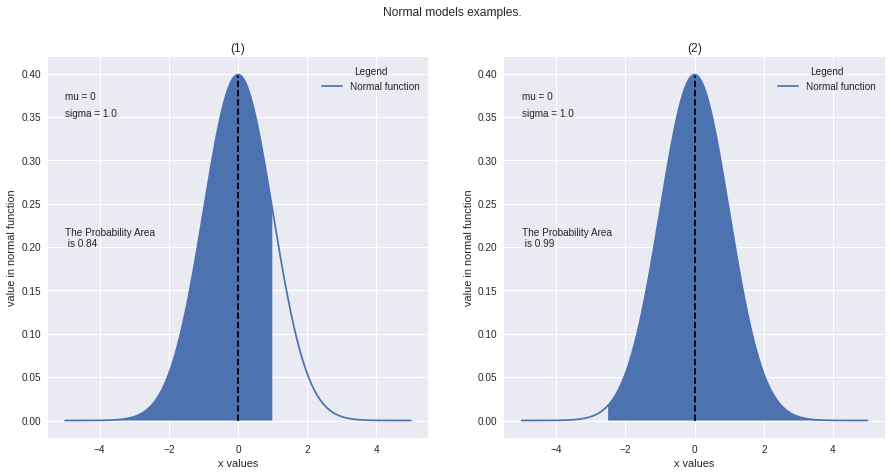

In [11]:
figure = plt.figure(figsize=(15,7))
figure.suptitle('Normal models examples.')
plots = figure.subplots(nrows=1, ncols=2)

plots[0].plot(x_values, y_values, label='Normal function')
plots[0].vlines(x_value_mu, 0, y_value_mu, ls='dashed', color='black')
plots[0].set_title('(1)')
plots[0].set_xlabel('x values')
plots[0].set_ylabel('value in normal function')
plots[0].text(-5, 0.37, 'mu = {}'.format(mu))
plots[0].text(-5, 0.35, 'sigma = {}'.format(np.sqrt(variance)))
plots[0].text(-5, 0.20, 'The Probability Area\n is {}'.format(normal_probability_01))
plots[0].fill_between(x_fill_01, y_fill_01)
plots[0].legend(title='Legend')

plots[1].plot(x_values, y_values, label='Normal function')
plots[1].vlines(x_value_mu, 0, y_value_mu, ls='dashed', color='black')
plots[1].set_title('(2)')
plots[1].set_xlabel('x values')
plots[1].set_ylabel('value in normal function')
plots[1].text(-5, 0.37, 'mu = {}'.format(mu))
plots[1].text(-5, 0.35, 'sigma = {}'.format(np.sqrt(variance)))
plots[1].text(-5, 0.20, 'The Probability Area\n is {}'.format(normal_probability_02))
plots[1].fill_between(x_fill_02, y_fill_02)
plots[1].legend(title='Legend')

Exemplo 7.9 do livro Estatística Básica e Bussab e Morettin (BUSSAB, MORETTIN, 2004).

Os depósitos efetuados no Banco da Ribeira durante o mês de janeiro são distribuídos normalmente, com média de $ 10.000,00 e desvio padrão de $ 1.500,00. Um depósito é selecionado ao acaso dentre todos os referentes ao mês em questão. Encontrar a probabilidade de que o depósito seja:

(a) $ 10.000,00 ou menos;

(b) pelo menos $10.000,00;

(c) um valor entre $ 12.000,00 e $ 15.000,00;

(d) maior do que $ 20.000,00.

Definição da média e da variância.

Média dada pelo exemplo 7.9 é de 10000, com variância de 2250000 (desvio parão ao quadrado).

In [12]:
mu_example = 10000
variance_example = 1500 ** 2

Definição do eixo x e do eixo y.

In [13]:
# x and y coordinate values
x_values_02 = list(np.around(np.arange(mu_example - 10000, mu_example + 10001, 100), 2))
y_values_02 = list(map(lambda value: 
                    normal_function(value, 
                                    mu_example, 
                                    variance_example), x_values_02))

Valor da coordenada (x,y) para o plot de uma linha vertical.

In [14]:
# (x,y) coordinate value for vertical line plot
x_value_mu_02 = x_values_02[int(len(x_values_02) / 2)]
y_value_mu_02 = normal_function(x_value_mu_02, mu_example, variance_example)

Definir o limite inferior e o limite superior de Z.

In [15]:
# Z inferior and upper values for example a.
inferior_limit_a = np.NINF
upper_limit_a = mu_example

# Z inferior and upper values for example b.
inferior_limit_b = mu_example
upper_limit_b = np.inf

# Z inferior and upper values for example c.
inferior_limit_c = 12000
upper_limit_c = 15000

# Z inferior and upper values for example d.
inferior_limit_d = 20000
upper_limit_d = np.inf

Probabilidade normal da área do limite inferior até o limite superior

In [16]:
# Normal probability for example a.
normal_probability_a = np.around(
    cumulative_distribution_function(inferior_limit_a, 
                                         upper_limit_a, 
                                         mu_example, variance_example), 4)
normal_probability_a = np.around(normal_probability_a, 2)

# Normal probability for example b.
normal_probability_b = np.around(
    cumulative_distribution_function(inferior_limit_b, 
                                         upper_limit_b, 
                                         mu_example, variance_example), 4)
normal_probability_b = np.around(normal_probability_b, 2)

# Normal probability for example c.
normal_probability_c = np.around(
    cumulative_distribution_function(inferior_limit_c, 
                                         upper_limit_c, 
                                         mu_example, variance_example), 4)
normal_probability_c = np.around(normal_probability_c, 2)

# Normal probability for example d.
normal_probability_d = np.around(
    cumulative_distribution_function(inferior_limit_d, 
                                         upper_limit_d, 
                                         mu_example, variance_example), 4)
normal_probability_d = np.around(normal_probability_d, 2)

Definir a area de preenchimento.

In [17]:
'''Creation of the lists of x and y coordinates for the probability area 
for example 01.'''
x_fill_a = x_values_02[0:int(x_values_02.index(upper_limit_a))]
y_fill_a = y_values_02[0:int(x_values_02.index(upper_limit_a))]

'''Creation of the lists of x and y coordinates for the probability area 
for example 02.'''
x_fill_b = x_values_02[int(x_values_02.index(inferior_limit_b)): len(x_values_02) - 1]
y_fill_b = y_values_02[int(x_values_02.index(inferior_limit_b)): len(x_values_02) - 1]

'''Creation of the lists of x and y coordinates for the probability area 
for example 03.'''
x_fill_c = x_values_02[
    int(x_values_02.index(inferior_limit_c)):int(x_values_02.index(upper_limit_c))]
y_fill_c = y_values_02[
    int(x_values_02.index(inferior_limit_c)):int(x_values_02.index(upper_limit_c))]

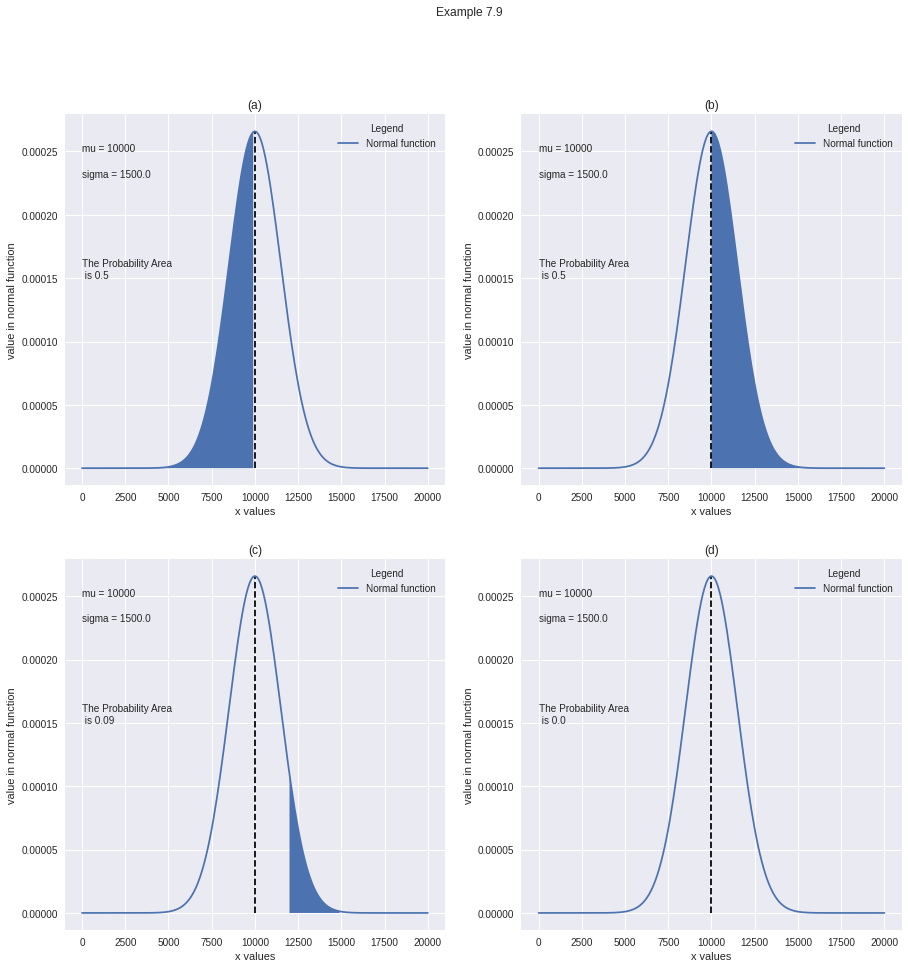

In [18]:
figure = plt.figure(figsize=(15, 15))
figure.suptitle('Example 7.9')
plots = figure.subplots(nrows=2, ncols=2)

plots[0][0].plot(x_values_02, y_values_02, label='Normal function')
plots[0][0].vlines(x_value_mu_02, 0, y_value_mu_02, ls='dashed', color='black')
plots[0][0].set_title('(a)')
plots[0][0].set_xlabel('x values')
plots[0][0].set_ylabel('value in normal function')
plots[0][0].text(0, 0.00025, 'mu = {}'.format(mu_example))
plots[0][0].text(0, 0.00023, 'sigma = {}'.format(np.sqrt(variance_example)))
plots[0][0].text(0, 0.00015, 'The Probability Area\n is {}'.format(normal_probability_a))
plots[0][0].fill_between(x_fill_a, y_fill_a)
plots[0][0].legend(title='Legend')

plots[0][1].plot(x_values_02, y_values_02, label='Normal function')
plots[0][1].vlines(x_value_mu_02, 0, y_value_mu_02, ls='dashed', color='black')
plots[0][1].set_title('(b)')
plots[0][1].set_xlabel('x values')
plots[0][1].set_ylabel('value in normal function')
plots[0][1].text(0, 0.00025, 'mu = {}'.format(mu_example))
plots[0][1].text(0, 0.00023, 'sigma = {}'.format(np.sqrt(variance_example)))
plots[0][1].text(0, 0.00015, 'The Probability Area\n is {}'.format(normal_probability_b))
plots[0][1].fill_between(x_fill_b, y_fill_b)
plots[0][1].legend(title='Legend')

plots[1][0].plot(x_values_02, y_values_02, label='Normal function')
plots[1][0].vlines(x_value_mu_02, 0, y_value_mu_02, ls='dashed', color='black')
plots[1][0].set_title('(c)')
plots[1][0].set_xlabel('x values')
plots[1][0].set_ylabel('value in normal function')
plots[1][0].text(0, 0.00025, 'mu = {}'.format(mu_example))
plots[1][0].text(0, 0.00023, 'sigma = {}'.format(np.sqrt(variance_example)))
plots[1][0].text(0, 0.00015, 'The Probability Area\n is {}'.format(normal_probability_c))
plots[1][0].fill_between(x_fill_c, y_fill_c)
plots[1][0].legend(title='Legend')

plots[1][1].plot(x_values_02, y_values_02, label='Normal function')
plots[1][1].vlines(x_value_mu_02, 0, y_value_mu_02, ls='dashed', color='black')
plots[1][1].set_title('(d)')
plots[1][1].set_xlabel('x values')
plots[1][1].set_ylabel('value in normal function')
plots[1][1].text(0, 0.00025, 'mu = {}'.format(mu_example))
plots[1][1].text(0, 0.00023, 'sigma = {}'.format(np.sqrt(variance_example)))
plots[1][1].text(0, 0.00015, 'The Probability Area\n is {}'.format(normal_probability_d))
plots[1][1].legend(title='Legend')

### Bicaudal


(1) Probabilidade menor de -1 e maior que 1 (mu: 0; variance: 1).

(2) Probabilidade menor de $ 5000 e maior que $ 15000 (mu: 10000; sigma: 1500).

In [19]:
# Z inferior and upper values for example 01.
inferior_limit_01a = np.NINF
upper_limit_01a = -1
inferior_limit_01b = 1
upper_limit_01b = np.inf

# Z inferior and upper values for example 02.
inferior_limit_02a = np.NINF
upper_limit_02a = 8500
inferior_limit_02b = 11000
upper_limit_02b = np.inf

In [20]:
# Normal probability for example 01.
normal_probability_01a = np.around(
    cumulative_distribution_function(inferior_limit_01a, 
                                         upper_limit_01a, 
                                         mu, variance), 4)
normal_probability_01b = np.around(
    cumulative_distribution_function(inferior_limit_01b, 
                                         upper_limit_01b, 
                                         mu, variance), 4)

normal_probability_01 = np.around(normal_probability_01a + normal_probability_01b, 2)

# Normal probability for example 02.
normal_probability_02a = np.around(
    cumulative_distribution_function(inferior_limit_02a, 
                                         upper_limit_02a, 
                                         mu_example, variance_example), 4)
normal_probability_02b = np.around(
    cumulative_distribution_function(inferior_limit_02b, 
                                         upper_limit_02b, 
                                         mu_example, variance_example), 4)
normal_probability_02 = np.around(normal_probability_02a + normal_probability_02b, 2)

In [21]:
'''Creation of the lists of x and y coordinates for the probability area 
for example 01.'''
x_inferior_01a = 0
x_upper_01a = int(x_values.index(upper_limit_01a)) + 1
y_inferior_01b = int(x_values.index(inferior_limit_01b))
y_upper_01b = len(x_values) - 1
x_fill_01a = x_values[0:x_upper_01a]
y_fill_01a = y_values[0:x_upper_01a]
x_fill_01b = x_values[y_inferior_01b:y_upper_01b]
y_fill_01b = y_values[int(x_values.index(inferior_limit_01b)):y_upper_01b]

'''Creation of the lists of x and y coordinates for the probability area 
for example 02.'''
x_inferior_02a = 0
x_upper_02a = int(x_values_02.index(upper_limit_02a)) + 1
y_inferior_02b = int(x_values_02.index(inferior_limit_02b))
y_upper_02b = len(x_values_02) - 1
x_fill_02a = x_values_02[x_inferior_02a:x_upper_02a]
y_fill_02a = y_values_02[x_inferior_02a:x_upper_02a]
x_fill_02b = x_values_02[y_inferior_02b:y_upper_02b]
y_fill_02b = y_values_02[y_inferior_02b:y_upper_02b]

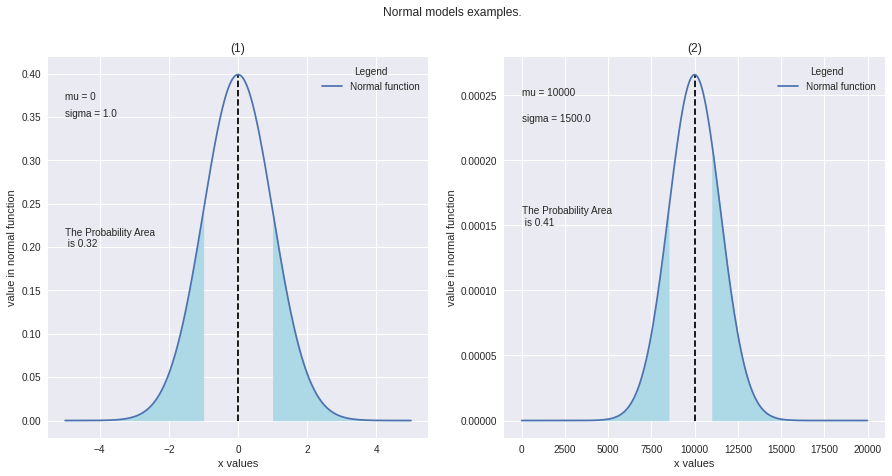

In [44]:
figure = plt.figure(figsize=(15,7))
figure.suptitle('Normal models examples.')
plots = figure.subplots(nrows=1, ncols=2)

plots[0].plot(x_values, y_values, label='Normal function')
plots[0].vlines(x_value_mu, 0, y_value_mu, ls='dashed', color='black')
plots[0].set_title('(1)')
plots[0].set_xlabel('x values')
plots[0].set_ylabel('value in normal function')
plots[0].text(-5, 0.37, 'mu = {}'.format(mu))
plots[0].text(-5, 0.35, 'sigma = {}'.format(np.sqrt(variance)))
plots[0].text(-5, 0.20, 'The Probability Area\n is {}'.format(normal_probability_01))
plots[0].fill_between(x_fill_01a, y_fill_01a, color='#ADD8E6')
plots[0].fill_between(x_fill_01b, y_fill_01b, color='#ADD8E6')
plots[0].legend(title='Legend')

plots[1].plot(x_values_02, y_values_02, label='Normal function')
plots[1].vlines(x_value_mu_02, 0, y_value_mu_02, ls='dashed', color='black')
plots[1].set_title('(2)')
plots[1].set_xlabel('x values')
plots[1].set_ylabel('value in normal function')
plots[1].text(-5, 0.00025, 'mu = {}'.format(mu_example))
plots[1].text(-5, 0.00023, 'sigma = {}'.format(np.sqrt(variance_example)))
plots[1].text(-5, 0.00015, 'The Probability Area\n is {}'.format(normal_probability_02))
plots[1].fill_between(x_fill_02a, y_fill_02a, color='#ADD8E6')
plots[1].fill_between(x_fill_02b, y_fill_02b, color='#ADD8E6')
plots[1].legend(title='Legend')

## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.